In [3]:
import matplotlib.pyplot as plt
import gzip
import numpy as np
from numpy.linalg import *
from matplotlib import rcParams
from sklearn import linear_model


rcParams.update({'font.size': 18})

In [4]:
%matplotlib inline  

In [17]:
#functions that are used throughout 
def find_results(data, x):
    #Takes the data and the x results of a fit and finds the predicted results 
    # along with the predicted results maximized by each column
    f = np.matmul(data, x)
    f_max = np.zeros(f.shape)
    for i in range(len(data)):
        f_max[i, np.argmax(f[i])] = 1
    return f, f_max

def find_error(data, labels, x):
    #finds the error in the results and the maximized results.
    f, f_max = find_results(data, x)
    f_error = np.linalg.norm(labels - f, ord=2)/np.linalg.norm(labels, ord=2)
    f_max_error = np.linalg.norm(labels - f_max, ord=2)/np.linalg.norm(labels, ord=2)
    return f_error, f_max_error

def find_num_right(x, data, labels):
    f,f_max = find_results(data, x)
    num_right = 0
    looking = f_max - labels
    for i in range(len(f)):
#         print(looking[i])
        if max(abs(looking [i])) == 0:
            num_right += 1
    return num_right

def count_num_zero(x):
    #counts the number of elements that have zero for all 10
    num_zero= 0
    for i in range(len(x)):
        if(max(abs(x[i])))==0:
            num_zero += 1
    return num_zero

In [6]:

f = gzip.open('train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 60000 


print(image_size * image_size * num_images)
f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
print(len(data))
print(len(buf))
data = data.reshape(num_images, image_size* image_size)

print(data.shape)


# image = np.asarray(data[3]).squeeze()
# plt.imshow(image)
# plt.show()

47040000
47040000
47040000
(60000, 784)


In [7]:
60007*784

47045488

In [8]:
f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8)
buf = f.read(image_size * image_size * num_images)
labels_num = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)

# print(labels_num[3:10])
print(labels_num.shape)

#set_up b vector right
labels = np.zeros([num_images, 10])
# print(labels[1][1])
for i in range(num_images):
    if labels_num[i] == 0:
        labels[i,9] = 1
    else:
        index = int(labels_num[i] - 1)
        labels[i][index] = 1
print(labels)

(60000,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [9]:
#get test data
f = gzip.open('t10k-images-idx3-ubyte.gz','r')

# image_size = 28
num_images_test = 10000 
f.read(16)
buf = f.read(image_size * image_size * num_images_test)
test_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
test_data = test_data.reshape(num_images_test, image_size* image_size)

print(test_data.shape)

f = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f.read(8)
buf = f.read(image_size * image_size * num_images_test)
labels_num = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)

# print(labels_num[3:10])
# print(labels_num.shape)

#set_up b vector right
test_labels = np.zeros([num_images_test, 10])
# print(labels[1][1])
for i in range(num_images_test):
    if labels_num[i] == 0:
        test_labels[i,9] = 1
    else:
        index = int(labels_num[i] - 1)
        test_labels[i][index] = 1
print(test_labels.shape)

(10000, 784)
(10000, 10)


In [22]:
def predict_lasso(alpha, data, labels, test  = False):
    print(alpha)
    clf = linear_model.Lasso(alpha=alpha)
    clf.fit(data, labels)
    x = clf.coef_
    x = np.transpose(x)
#     f, f_max = find_results(data, x)
#     error, error_max = find_error(data, labels, x)
    num_zero = count_num_zero(x)
    num_right = find_num_right(x, data, labels)
    if test:
            num_right_test = find_num_right(x, test_data, test_labels)
            return num_zero, num_right, num_right_test, x
    
    return num_zero, num_right, x

# error, error_max, num_zero = predict_lasso(0.1, data, labels)

def many_lasso(num, data, labels, lower = 0.1, upper = 1, plot=True):
    alpha_list = []
    right_list = []
    num_zero_list = []
    for alpha in np.linspace(lower, upper, num):
        print(alpha)
        num_zero, num_right = predict_lasso(alpha, data, labels)
#         error_list.append(error)
#         error_max_list.append(error_max)
        right_list.append(num_right)
        num_zero_list.append(num_zero)
        alpha_list.append(alpha)
        
    if plot:
        plt.plot(num_zero_list, right_list, 'ob')
#         plt.plot(num_zero_list, error_list, 'or')

    return alpha_list, right_list, num_zero_list

def many_lasso_test(num, data, labels, lower = 0.1, upper = 1, plot=True):
    alpha_list = []
    right_list = []
    num_zero_list = []
    right_test_list = []
    x_list = []
    for alpha in np.linspace(lower, upper, num):
        print(alpha)
        num_zero, num_right, num_right_test, x = predict_lasso(alpha, data, labels, test = True)
#         error_list.append(error)
#         error_max_list.append(error_max)
        right_list.append(num_right)
        num_zero_list.append(num_zero)
        alpha_list.append(alpha)
        right_test_list.append(num_right_test)
        x_list.append(x)
        
    try:
        if plot:
            plt.plot(num_zero_list, right_list, 'ob')
            plt.plot(num_zero_list, right_test_list, 'or')
    except:
        print("Problem plotting")

    return alpha_list, right_list, num_zero_list, right_test_list, x_list

# alpha_list, right_list, num_zero_list = many_lasso(25, data, labels, lower = 0.001, upper = 10)

In [23]:
alpha_list, right_list, num_zero_list, right_test_list, x_list = many_lasso_test(20, data, labels, lower = 0.01, upper = 13, plot = False)

0.01
0.01
0.6936842105263158
0.6936842105263158
1.3773684210526316
1.3773684210526316
2.061052631578947
2.061052631578947
2.744736842105263
2.744736842105263
3.428421052631579
3.428421052631579
4.112105263157894
4.112105263157894
4.79578947368421
4.79578947368421
5.479473684210526
5.479473684210526
6.163157894736842
6.163157894736842
6.846842105263158
6.846842105263158
7.530526315789474
7.530526315789474
8.214210526315789
8.214210526315789
8.897894736842105
8.897894736842105
9.58157894736842
9.58157894736842
10.265263157894736
10.265263157894736
10.948947368421052
10.948947368421052
11.632631578947368
11.632631578947368
12.316315789473684
12.316315789473684
13.0
13.0


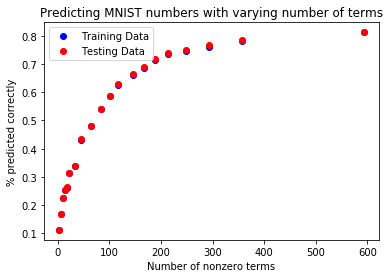

In [24]:
x_axis = np.ones(len(num_zero_list)) *image_size*image_size - num_zero_list
plt.plot(x_axis, np.divide(right_list, len(data)), 'ob', label = "Training Data")
plt.plot(x_axis, np.divide(right_test_list, len(test_data)), 'or', label= "Testing Data")
plt.xlabel("Number of nonzero terms")
plt.ylabel("% predicted correctly")
plt.legend()
plt.title("Predicting MNIST numbers with varying number of terms")
plt.show()

In [32]:
right_list[-1]/60000
f, f_max = find_results(data, x_list[-1])
print(f_max)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


Text(0.5, 0.98, 'Importance of Each pixel with various number of nonzero terms')

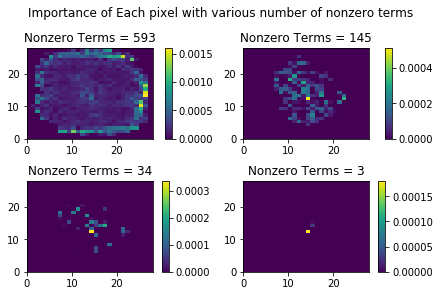

In [25]:
fig, axs = plt.subplots(2, 2,  constrained_layout=True)
i = 0
x = x_list[i]
normed = norm(x, axis = 1)
box = normed.reshape(image_size, image_size)
# x1_norm = norm(x1_box, axis = 2)
c = axs[0,0].pcolor(box)
axs[0,0].set_title("Nonzero Terms = "+str(image_size**2 - num_zero_list[i]))
fig.colorbar(c, ax=axs[0,0])

i = 7
x = x_list[i]
normed = norm(x, axis = 1)
box = normed.reshape(image_size, image_size)
# x1_norm = norm(x1_box, axis = 2)
c = axs[0,1].pcolor(box)
axs[0,1].set_title("Nonzero Terms = "+str(image_size**2 - num_zero_list[i]))
fig.colorbar(c, ax=axs[0,1])

i = 13
x = x_list[i]
normed = norm(x, axis = 1)
box = normed.reshape(image_size, image_size)
# x1_norm = norm(x1_box, axis = 2)
c = axs[1,0].pcolor(box)
axs[1,0].set_title("Nonzero Terms = "+str(image_size**2 - num_zero_list[i]))
fig.colorbar(c, ax=axs[1,0])

i = 19
x = x_list[i]
normed = norm(x, axis = 1)
box = normed.reshape(image_size, image_size)
# x1_norm = norm(x1_box, axis = 2)
c = axs[1,1].pcolor(box)
axs[1,1].set_title("Nonzero Terms = "+str(image_size**2 - num_zero_list[i]))
fig.colorbar(c, ax=axs[1,1])

plt.suptitle("Importance of Each pixel with various number of nonzero terms")
# plt.tight_layout()


13
nonzero =  3
350


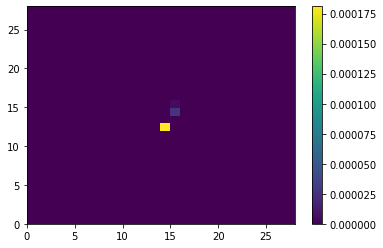

In [21]:
# print(number)
num_zero, num_right, x = predict_lasso(13, data, labels, test  = False)
print("nonzero = ", 28*28 - num_zero)
# print(np.argmax(abs(x)))
# print(max(abs(x)))
# print(sum(x))
# print(x)

plt.figure()
normed = norm(x, axis = 1)
print(np.argmax(abs(normed)))
box = normed.reshape(image_size, image_size)
# x1_norm = norm(x1_box, axis = 2)
plt.pcolor(box)
# plt.title("Nonzero Terms = "+str(image_size**2 - num_zero_list[i]))
plt.colorbar()

In [95]:
#Finding most informative pixels 
i = 19
x = x_list[i]
normed = norm(x, axis = 1)
box = normed.reshape(image_size, image_size)

sort  = (-normed).argsort()[:10]
print(sort)

i = 18
x = x_list[i]
normed = norm(x, axis = 1)
box = normed.reshape(image_size, image_size)

sort  = (-normed).argsort()[:10]
print(sort)

i = 17
x = x_list[i]
normed = norm(x, axis = 1)
box = normed.reshape(image_size, image_size)

sort  = (-normed).argsort()[:10]
print(sort)

print(int(sort[0]/image_size), ", ", sort[0]%image_size)

np.argmax(box)
# print(np.argmax(normed))

[350 409 543 489 357 378 435 323 434 511]
[350 409 543 489 357 434 405 323 378 511]
[350 409 489 543 405 434 514 408 511 242]
12 ,  14


350

In [ ]:
plt.plot()

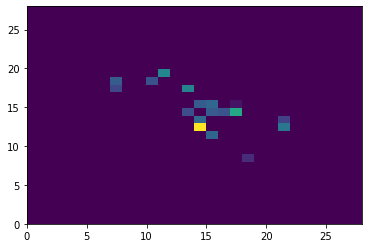

In [54]:
clf = linear_model.Lasso(alpha=10)
clf.fit(data, labels)
x = clf.coef_
x = np.transpose(x)
f, f_max = find_results(data, x)
error, error_max = find_error(data, labels, x)
num_zero = count_num_zero(x)

normed = norm(x, axis = 1)
box = normed.reshape(image_size, image_size)
# x1_norm = norm(x1_box, axis = 2)
plt.pcolor(box)